In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN, KMeans
import seaborn as sns

from rdkit import Chem
from rdkit.Chem import AllChem

import matplotlib.pyplot as plt

random_state=42

In [2]:
def get_morgan_fingerprint(smiles, radius=2, n_bits=2048):
    mol = Chem.MolFromSmiles(smiles)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
    return np.array(fp, dtype=int)

In [3]:
df=pd.read_csv('./data/natural_products8.csv', index_col='CHEMBL_ID')
df = df.dropna()
df

,Is_Natural_Product,Is_Anaglesic,pka_acid,Smiles
CHEMBL_ID,,,,
CHEMBL485,1,1,13.780,COc1ccc2c3c1O[C@H]1[C@@H](O)C=C[C@H]4[C@@H](C2...
CHEMBL70,1,1,10.260,CN1CC[C@]23c4c5ccc(O)c4O[C@H]2[C@@H](O)C=C[C@H...
CHEMBL113,1,0,10.754,Cn1c(=O)c2c(ncn2C)n(C)c1=O
CHEMBL3,1,0,10.754,CN1CCC[C@H]1c1cccnc1
CHEMBL517712,1,0,10.754,CN1[C@@H]2CC[C@H]1C[C@@H](OC(=O)C(CO)c1ccccc1)C2
CHEMBL170,1,0,13.890,C=C[C@H]1CN2CC[C@H]1C[C@H]2[C@H](O)c1ccnc2ccc(...
CHEMBL4596781,0,0,10.754,Clc1ccc(OCCCn2c3c(c4c(Cl)cccc42)CCNC3)cc1
CHEMBL4803817,0,0,6.960,CCOc1cc2c(cc1OCCCN)-c1c(c(Nc3cccc(C(=O)CC)n3)n...
CHEMBL4597035,0,0,10.754,CCCCCC/C=C/c1ccc(CO[C@H]2C[C@H](CO)N(C)C2)cc1


In [4]:
df['morgan_fingerprint']=[get_morgan_fingerprint(smiles) for smiles in df.Smiles]

X = df.copy().drop('Smiles', axis=1)
X

,Is_Natural_Product,Is_Anaglesic,pka_acid,morgan_fingerprint
CHEMBL_ID,,,,
CHEMBL485,1,1,13.780,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
CHEMBL70,1,1,10.260,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
CHEMBL113,1,0,10.754,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
CHEMBL3,1,0,10.754,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
CHEMBL517712,1,0,10.754,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
CHEMBL170,1,0,13.890,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
CHEMBL4596781,0,0,10.754,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
CHEMBL4803817,0,0,6.960,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
CHEMBL4597035,0,0,10.754,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


# TSNE WITH KMEANS

In [5]:
data=np.hstack((np.array(list(X['morgan_fingerprint'])), X['pka_acid'].values.reshape(-1, 1), X['Is_Anaglesic'].values.reshape(-1, 1), X['Is_Natural_Product'].values.reshape(-1, 1)))

In [6]:
tsne = TSNE(n_components=2, verbose=2, perplexity=5, n_iter=5000, random_state=random_state)
tsne_results = tsne.fit_transform(data)
tsne_results

[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 11 samples in 0.000s...
[t-SNE] Computed neighbors for 11 samples in 0.046s...
[t-SNE] Computed conditional probabilities for sample 11 / 11
[t-SNE] Mean sigma: 2.898143
[t-SNE] Computed conditional probabilities in 0.000s
[t-SNE] Iteration 50: error = 50.1370087, gradient norm = 0.9602878 (50 iterations in 0.135s)
[t-SNE] Iteration 100: error = 53.1499557, gradient norm = 0.4081179 (50 iterations in 0.092s)
[t-SNE] Iteration 150: error = 58.4439468, gradient norm = 0.2378004 (50 iterations in 0.033s)
[t-SNE] Iteration 200: error = 52.4153175, gradient norm = 1.3753598 (50 iterations in 0.014s)
[t-SNE] Iteration 250: error = 54.3458633, gradient norm = 1.3967166 (50 iterations in 0.009s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.345863
[t-SNE] Iteration 300: error = 0.6836879, gradient norm = 0.0127769 (50 iterations in 0.009s)
[t-SNE] Iteration 350: error = 0.5235443, gradient norm = 0.0079548 (50 i

array([[  90.3023   ,   77.30104  ],
       [  84.039474 ,   41.772194 ],
       [ -25.893225 ,  -33.382442 ],
       [ -24.67511  ,    4.4372888],
       [ -66.41702  ,   -5.1380434],
       [-134.38625  ,  -13.701679 ],
       [  -1.6138389,   55.51668  ],
       [  47.153694 ,  -81.90988  ],
       [ -75.85455  ,   47.359432 ],
       [  27.462856 ,  -27.357409 ],
       [ -63.28449  ,  -86.119514 ]], dtype=float32)

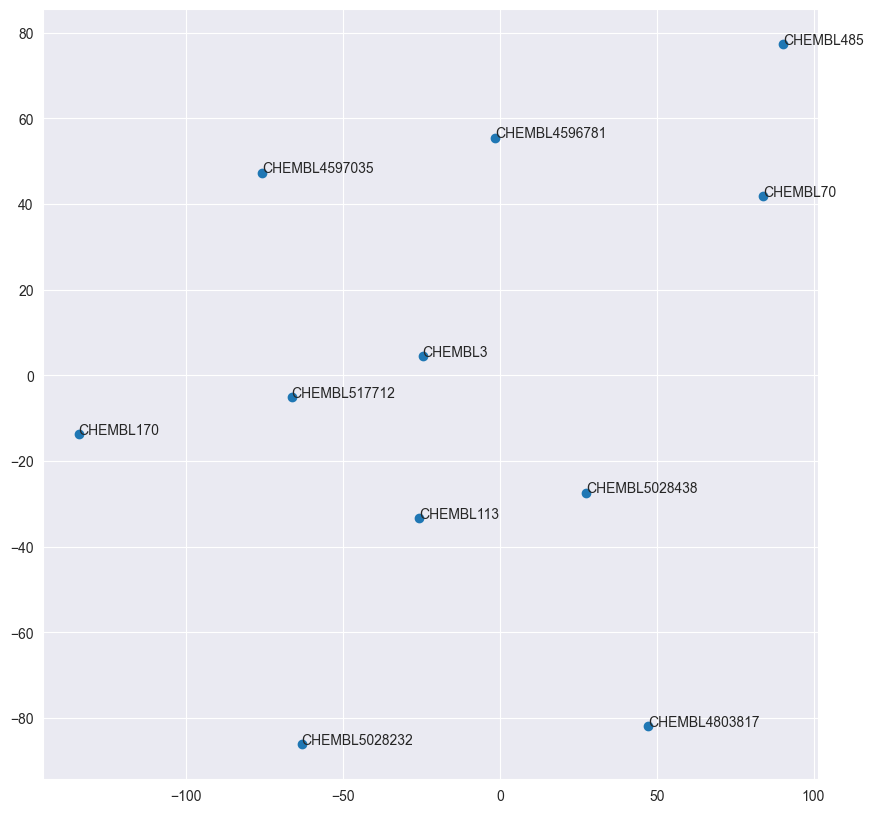

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(tsne_results[:,0], tsne_results[:,1])
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i,0], tsne_results[i,1], df.iloc[i].name)
plt.show()

## K-means clustering on tsne results

In [8]:
#kmeans from the TSNE results
n_clusters=2
km = KMeans(n_clusters=n_clusters, random_state=random_state)
km.fit(tsne_results)
km

KMeans(n_clusters=2, random_state=42)

In [9]:
df['tsne_km_cluster'] = km.labels_
df

,Is_Natural_Product,Is_Anaglesic,pka_acid,Smiles,morgan_fingerprint,tsne_km_cluster
CHEMBL_ID,,,,,,
CHEMBL485,1,1,13.780,COc1ccc2c3c1O[C@H]1[C@@H](O)C=C[C@H]4[C@@H](C2...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
CHEMBL70,1,1,10.260,CN1CC[C@]23c4c5ccc(O)c4O[C@H]2[C@@H](O)C=C[C@H...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
CHEMBL113,1,0,10.754,Cn1c(=O)c2c(ncn2C)n(C)c1=O,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
CHEMBL3,1,0,10.754,CN1CCC[C@H]1c1cccnc1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
CHEMBL517712,1,0,10.754,CN1[C@@H]2CC[C@H]1C[C@@H](OC(=O)C(CO)c1ccccc1)C2,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
CHEMBL170,1,0,13.890,C=C[C@H]1CN2CC[C@H]1C[C@H]2[C@H](O)c1ccnc2ccc(...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
CHEMBL4596781,0,0,10.754,Clc1ccc(OCCCn2c3c(c4c(Cl)cccc42)CCNC3)cc1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",0
CHEMBL4803817,0,0,6.960,CCOc1cc2c(cc1OCCCN)-c1c(c(Nc3cccc(C(=O)CC)n3)n...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",1
CHEMBL4597035,0,0,10.754,CCCCCC/C=C/c1ccc(CO[C@H]2C[C@H](CO)N(C)C2)cc1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0


In [10]:
clusters = df.groupby('tsne_km_cluster')

In [11]:
cluster_centers = km.cluster_centers_
cluster_centers

array([[-56.017788 ,  -4.4326105],
       [ 62.23958  ,   2.4514866]], dtype=float32)

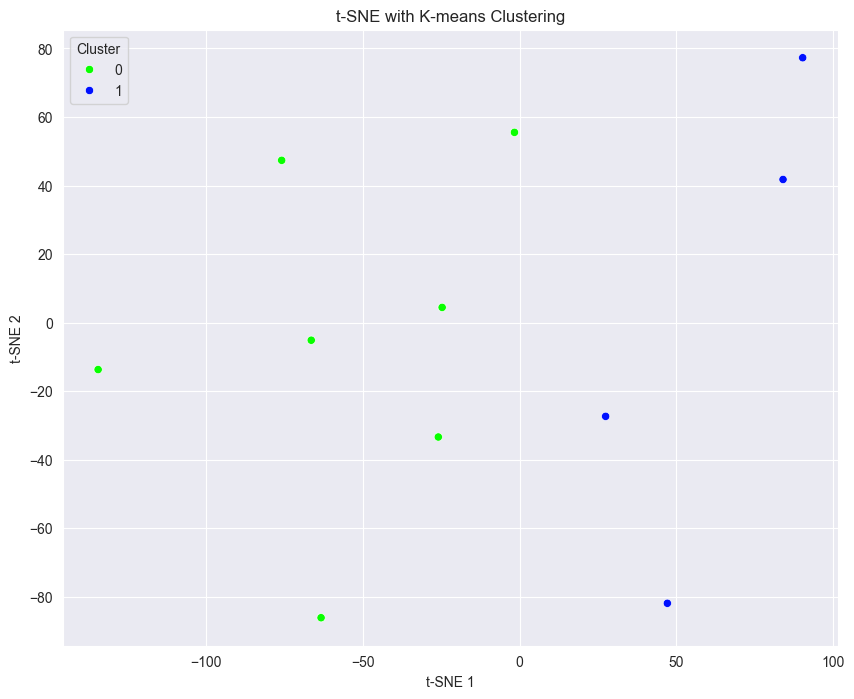

In [12]:
# Plot t-SNE results with cluster assignments
plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=df['tsne_km_cluster'], palette=sns.color_palette("hsv", n_clusters))
plt.title('t-SNE with K-means Clustering')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Cluster')
plt.show()

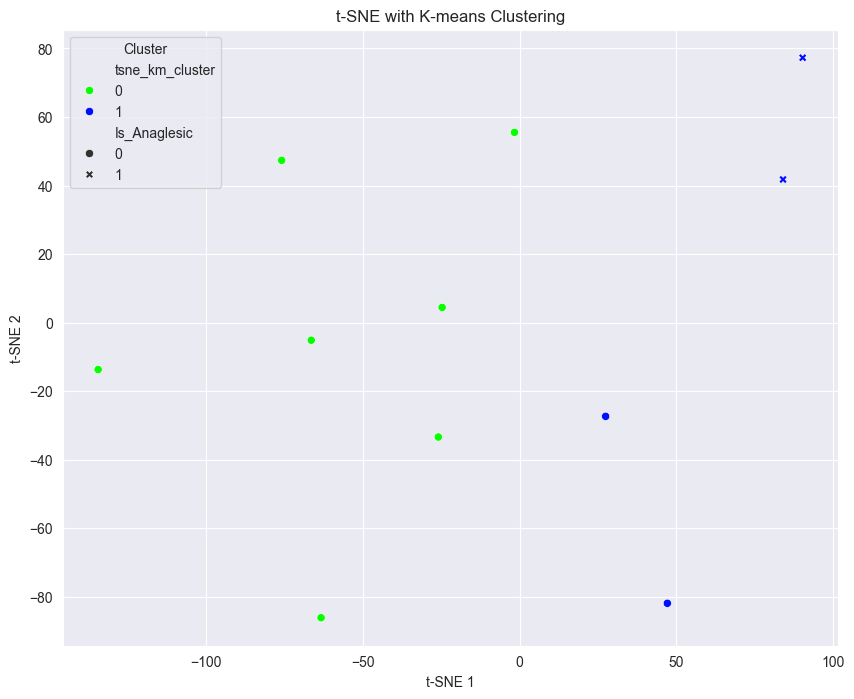

In [13]:
# Plot t-SNE results with cluster assignments
plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=df['tsne_km_cluster'], palette=sns.color_palette("hsv", n_clusters), style=df['Is_Anaglesic'])
plt.title('t-SNE with K-means Clustering')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Cluster')
plt.show()


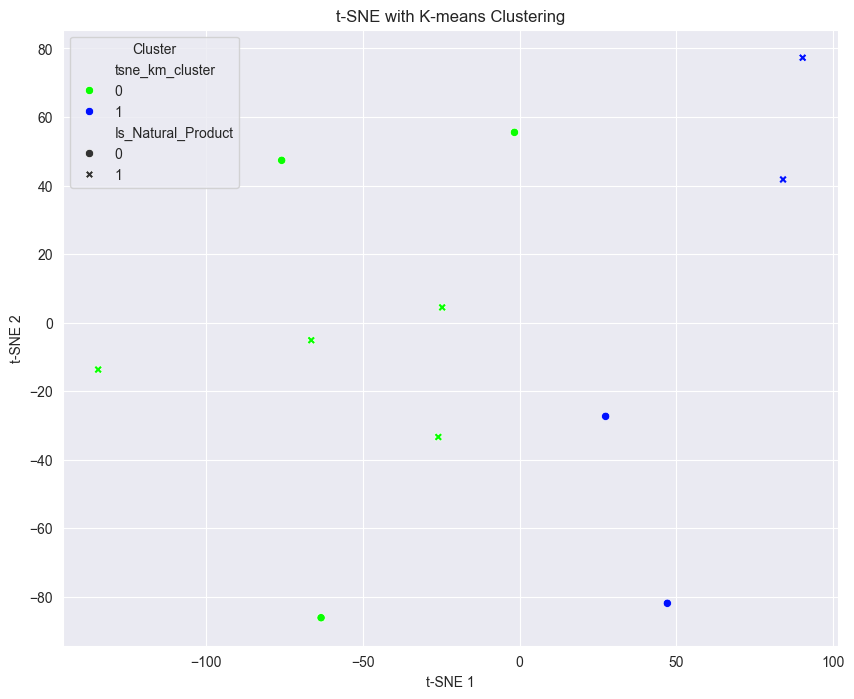

In [14]:
# Plot t-SNE results with cluster assignments
plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=df['tsne_km_cluster'], palette=sns.color_palette("hsv", n_clusters), style=df['Is_Natural_Product'])
plt.title('t-SNE with K-means Clustering')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Cluster')
plt.show()

# TSNE WITH DBSCAN

In [15]:
db = DBSCAN(eps=0.5, min_samples=4).fit(tsne_results)
labels = db.labels_ + 1

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

df['tsne_db_cluster']=labels

Estimated number of clusters: 1
Estimated number of noise points: 0


/var/folders/h5/c1fg9pqx7rvd63glykqthsg40000gn/T/ipykernel_11175/2332571677.py:2: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(


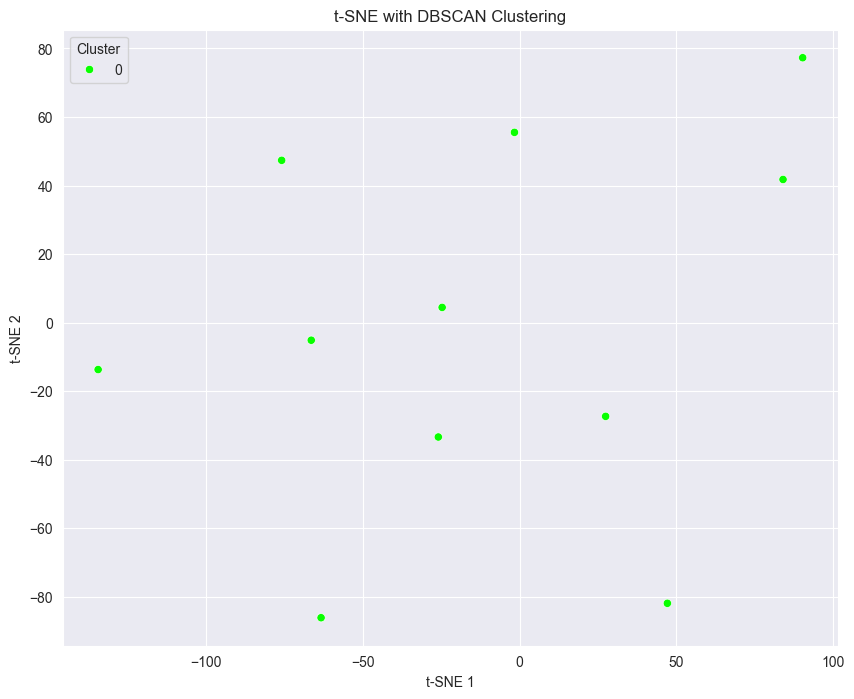

In [16]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=tsne_results[:, 0], y=tsne_results[:, 1],
    hue=df['tsne_db_cluster'],
    palette=sns.color_palette("hsv", n_clusters_ + 1),  # +1 to include noise cluster if any
    data=df,
    legend="full"
)
plt.title('t-SNE with DBSCAN Clustering')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Cluster')
plt.show()

## Just DBSCAN

In [32]:
db = DBSCAN(eps=0.5, min_samples=4).fit(data)
labels = db.labels_ + 1

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
df['db_cluster']=labels

Estimated number of clusters: 1
Estimated number of noise points: 0


/var/folders/h5/c1fg9pqx7rvd63glykqthsg40000gn/T/ipykernel_11175/3412239422.py:2: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(


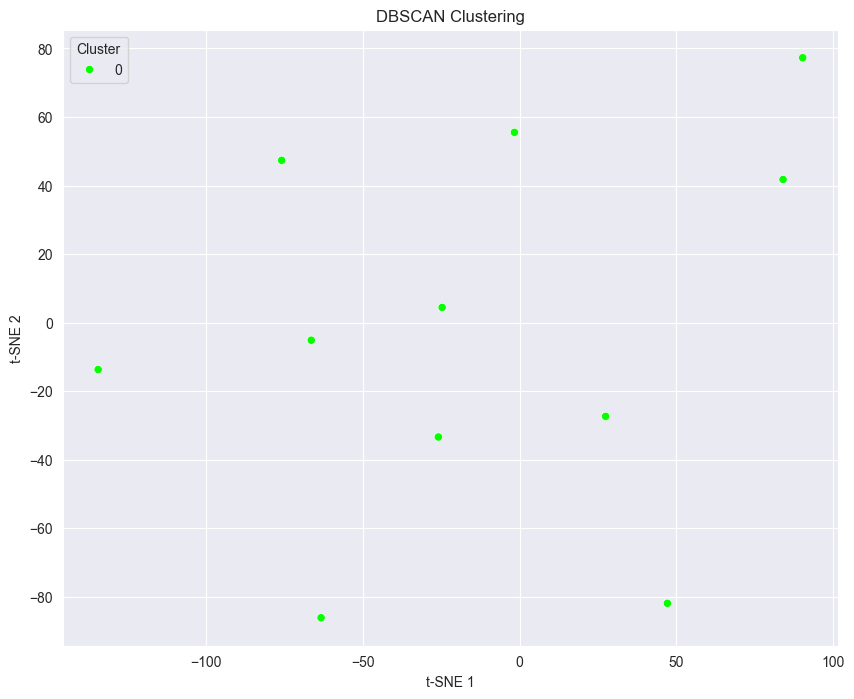

In [33]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=tsne_results[:, 0], y=tsne_results[:, 1],
    hue=df['db_cluster'],
    palette=sns.color_palette("hsv", n_clusters_ + 1),  # +1 to include noise cluster if any
    data=df,
    legend="full"
)
plt.title('DBSCAN Clustering')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Cluster')
plt.show()

In [19]:
df=df.drop('morgan_fingerprint', axis=1)
df=df.drop('Smiles', axis=1)
df.to_csv('./outputs/clustered_examples_8.csv')
df.to_excel('./outputs/clustered_examples_8.xlsx')